In [15]:
import yfinance as yf
from tabulate import tabulate

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Extraer los datos históricos usando la función `history` con el período máximo
tesla_data = tesla.history(period="max")

# Restablecer el índice
tesla_data.reset_index(inplace=True)

print(tabulate(tesla_data.head(), headers='keys', tablefmt='fancy_grid'))


╒════╤═══════════════════════════╤═════════╤═════════╤═════════╤═════════╤═══════════╤═════════════╤════════════════╕
│    │ Date                      │    Open │    High │     Low │   Close │    Volume │   Dividends │   Stock Splits │
╞════╪═══════════════════════════╪═════════╪═════════╪═════════╪═════════╪═══════════╪═════════════╪════════════════╡
│  0 │ 2010-06-29 00:00:00-04:00 │ 1.26667 │ 1.66667 │ 1.16933 │ 1.59267 │ 281494500 │           0 │              0 │
├────┼───────────────────────────┼─────────┼─────────┼─────────┼─────────┼───────────┼─────────────┼────────────────┤
│  1 │ 2010-06-30 00:00:00-04:00 │ 1.71933 │ 2.028   │ 1.55333 │ 1.58867 │ 257806500 │           0 │              0 │
├────┼───────────────────────────┼─────────┼─────────┼─────────┼─────────┼───────────┼─────────────┼────────────────┤
│  2 │ 2010-07-01 00:00:00-04:00 │ 1.66667 │ 1.728   │ 1.35133 │ 1.464   │ 123282000 │           0 │              0 │
├────┼───────────────────────────┼─────────┼─────────┼──

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de los datos de ingresos de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Realizar la solicitud a la página web
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Buscar la tabla con el título "Tesla Quarterly Revenue"
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Extraer datos de la tabla
data = []
for row in revenue_table.find_all("tr")[1:]:  # Omitir la fila del encabezado
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if len(cols) == 2:  # Asegurarse de que la fila tiene dos columnas (fecha e ingresos)
        data.append(cols)

# Crear un DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Limpiar y convertir los valores
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").replace("", "0")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != "0"]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Mostrar las últimas cinco filas
print(tesla_revenue.tail())


         Date  Revenue
48 2010-09-30       31
49 2010-06-30       28
50 2010-03-31       21
52 2009-09-30       46
53 2009-06-30       27


In [29]:
import yfinance as yf
from tabulate import tabulate

# Crear el objeto Ticker para GameStop
gamestop = yf.Ticker("GME")

# Extraer los datos históricos usando la función `history` con el período máximo
gme_data = gamestop.history(period="max")

# Restablecer el índice
gme_data.reset_index(inplace=True)

print(tabulate(gme_data.head(), headers='keys', tablefmt='fancy_grid'))


╒════╤═══════════════════════════╤═════════╤═════════╤═════════╤═════════╤══════════╤═════════════╤════════════════╕
│    │ Date                      │    Open │    High │     Low │   Close │   Volume │   Dividends │   Stock Splits │
╞════╪═══════════════════════════╪═════════╪═════════╪═════════╪═════════╪══════════╪═════════════╪════════════════╡
│  0 │ 2002-02-13 00:00:00-05:00 │ 1.62013 │ 1.69335 │ 1.6033  │ 1.69167 │ 76216000 │           0 │              0 │
├────┼───────────────────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────────┼────────────────┤
│  1 │ 2002-02-14 00:00:00-05:00 │ 1.71271 │ 1.71607 │ 1.67063 │ 1.68325 │ 11021600 │           0 │              0 │
├────┼───────────────────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────────┼────────────────┤
│  2 │ 2002-02-15 00:00:00-05:00 │ 1.68325 │ 1.68746 │ 1.658   │ 1.67483 │  8389600 │           0 │              0 │
├────┼───────────────────────────┼─────────┼─────────┼─────────┼

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de los datos de ingresos de GameStop
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Realizar la solicitud a la página web
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Buscar la tabla con el título "GameStop Quarterly Revenue"
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Extraer datos de la tabla
data = []
for row in revenue_table.find_all("tr")[1:]:  # Omitir la fila del encabezado
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if len(cols) == 2 and cols[1] != "":  # Evitar filas vacías
        data.append(cols)

# Crear un DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Limpiar y convertir los valores
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Mostrar las últimas cinco filas
print(gme_revenue.tail())


         Date  Revenue
57 2006-01-31     1667
58 2005-10-31      534
59 2005-07-31      416
60 2005-04-30      475
61 2005-01-31      709


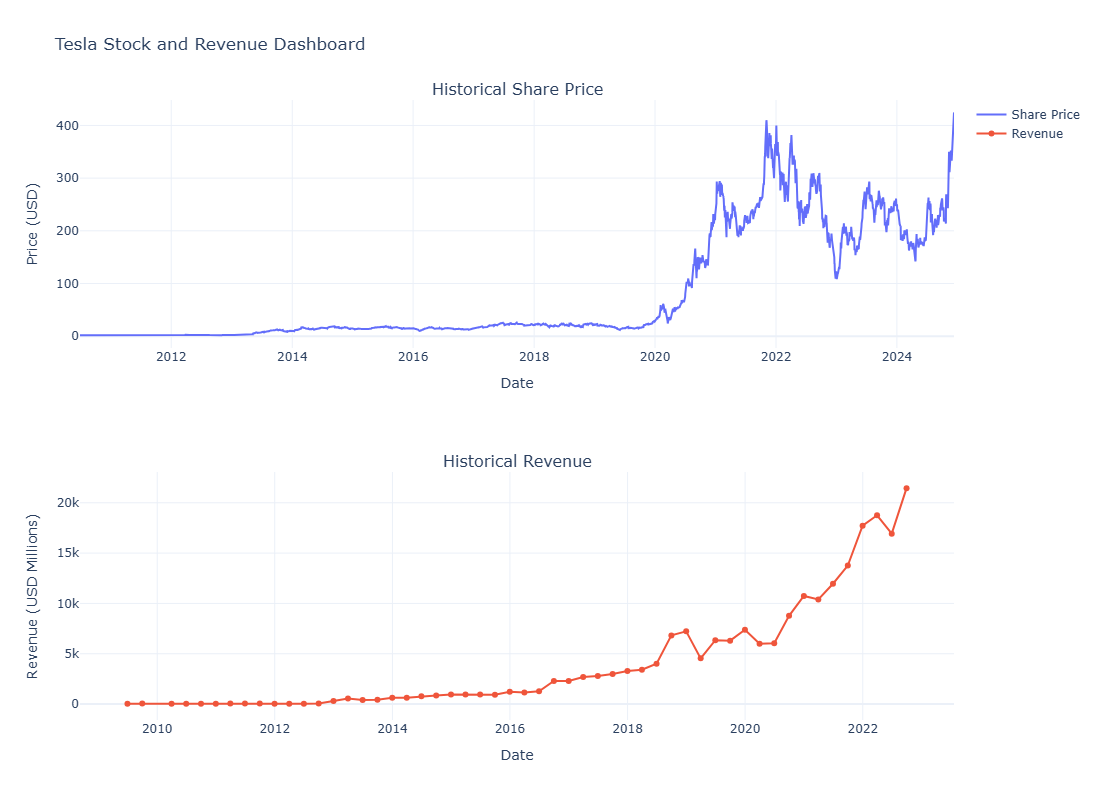

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear un gráfico con dos subplots y mayor espacio vertical
fig = make_subplots(
    rows=2, 
    cols=1, 
    subplot_titles=("Historical Share Price", "Historical Revenue"),
    vertical_spacing=0.2  # Aumentar el espacio entre gráficos
)

# Gráfico de precios históricos de Tesla
fig.add_trace(
    go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], mode='lines', name='Share Price'),
    row=1, col=1
)

# Gráfico de ingresos históricos de Tesla
fig.add_trace(
    go.Scatter(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], mode='lines+markers', name='Revenue'),
    row=2, col=1
)

# Ajustar títulos y etiquetas
fig.update_layout(
    title="Tesla Stock and Revenue Dashboard",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis2_title="Date",
    yaxis2_title="Revenue (USD Millions)",
    template="plotly_white",
    height=800  # Aumentar la altura total del gráfico
)

# Mostrar el gráfico
fig.show()


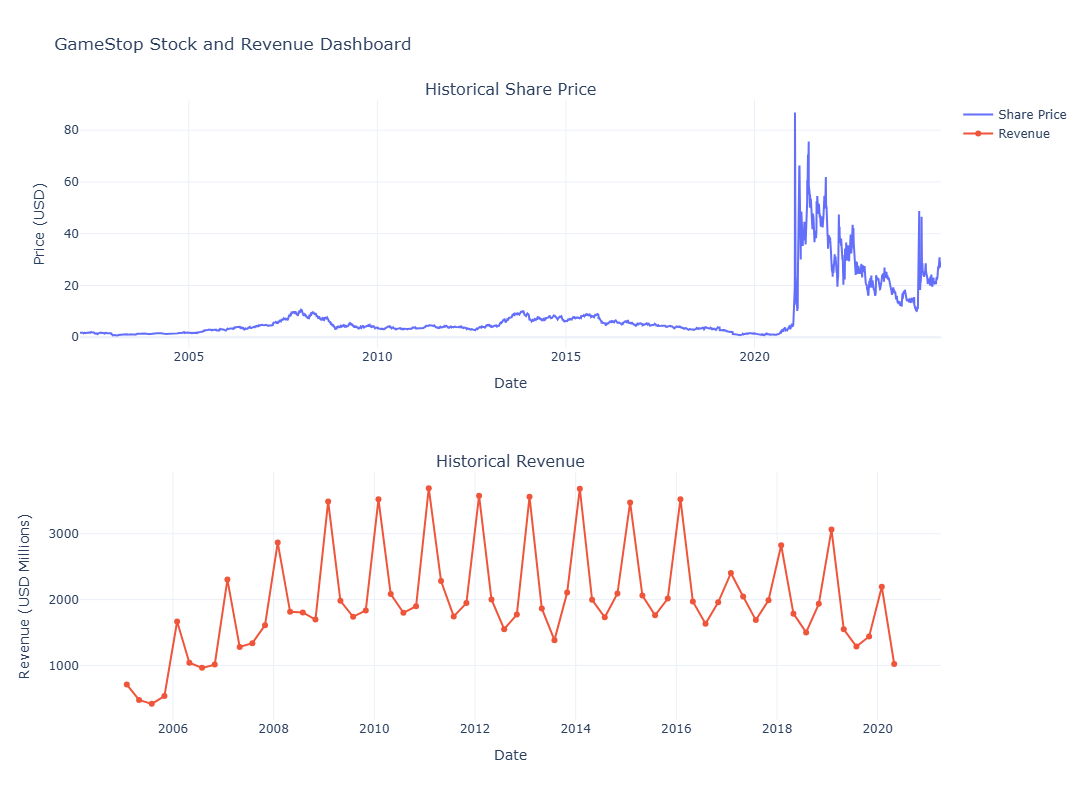

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear un gráfico con dos subplots para GameStop
fig = make_subplots(
    rows=2, 
    cols=1, 
    subplot_titles=("Historical Share Price", "Historical Revenue"),
    vertical_spacing=0.2  # Ajustar el espacio entre gráficos
)

# Gráfico de precios históricos de GameStop
fig.add_trace(
    go.Scatter(x=gme_data['Date'], y=gme_data['Close'], mode='lines', name='Share Price'),
    row=1, col=1
)

# Gráfico de ingresos históricos de GameStop
fig.add_trace(
    go.Scatter(x=gme_revenue['Date'], y=gme_revenue['Revenue'], mode='lines+markers', name='Revenue'),
    row=2, col=1
)

# Ajustar títulos y etiquetas
fig.update_layout(
    title="GameStop Stock and Revenue Dashboard",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis2_title="Date",
    yaxis2_title="Revenue (USD Millions)",
    template="plotly_white",
    height=800  # Aumentar la altura total del gráfico
)

# Mostrar el gráfico
fig.show()
